Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

Loading Main Dataset

In [2]:
df = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\SVM\datasets\churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [4]:
df.isna().sum().sum()

np.int64(0)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'], axis=1, inplace=True)

In [7]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,200.386159,100.023631,201.168942,100.106152,10.237022,4.467367,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,50.951515,20.161445,50.780323,19.418459,2.788349,2.456195,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,43.700000,33.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,165.300000,87.000000,166.925000,87.000000,8.500000,3.000000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,200.900000,100.000000,201.150000,100.000000,10.200000,4.000000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,235.100000,114.000000,236.475000,113.000000,12.100000,6.000000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,363.700000,170.000000,395.000000,166.000000,20.000000,20.000000,9.000000


Exploratory Data Analysis

Numerical Variable Distribution

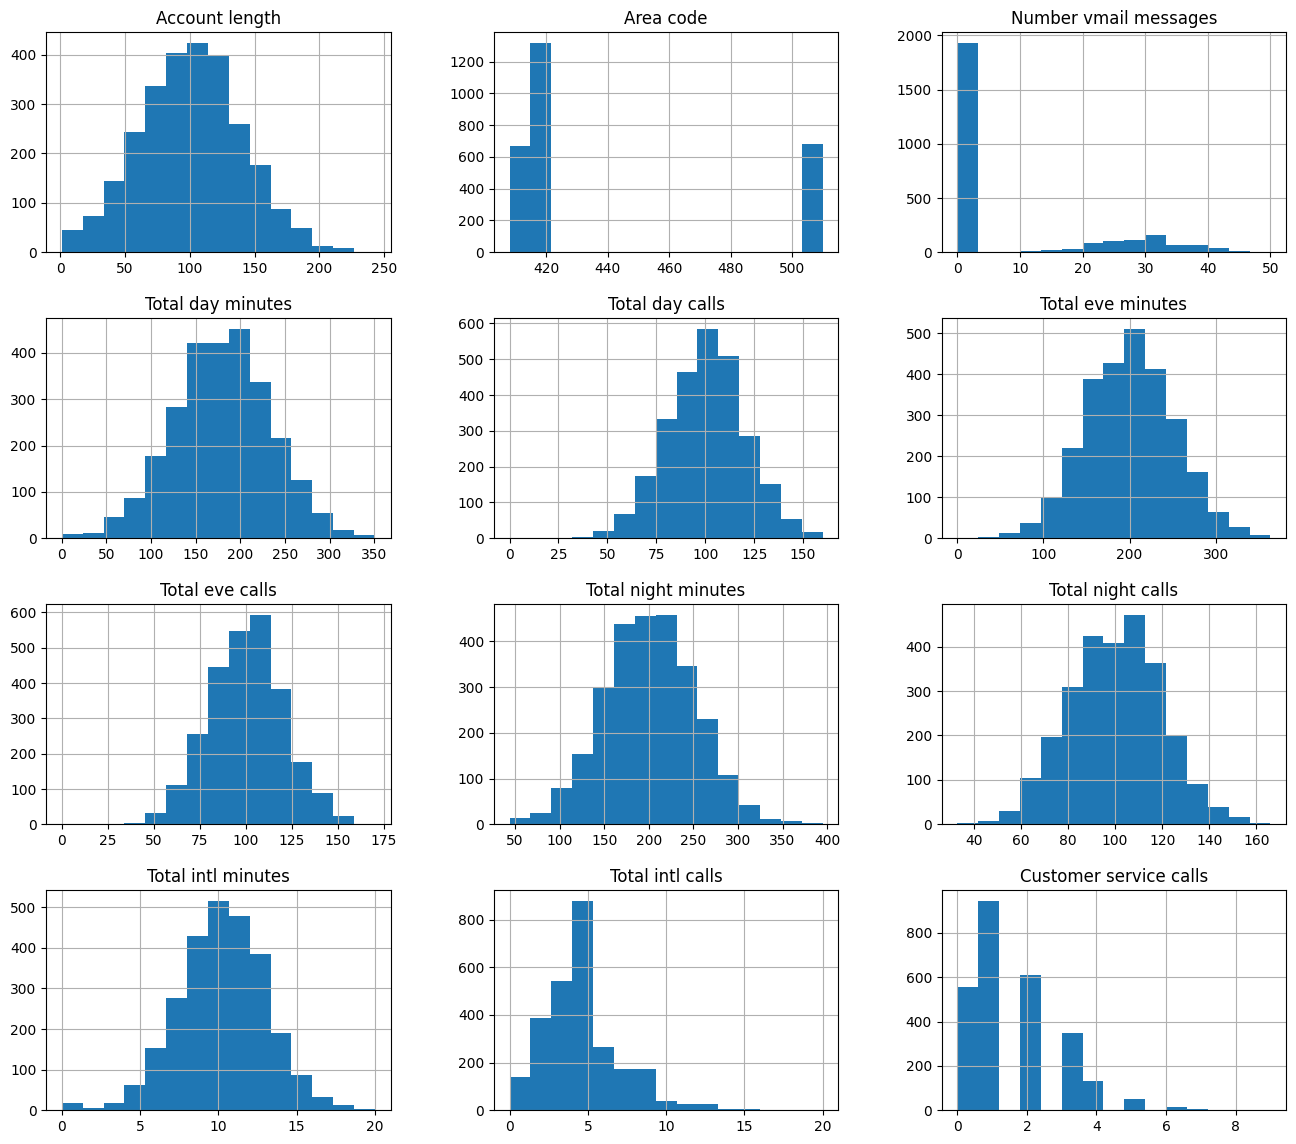

In [8]:
df_num = df._get_numeric_data().drop('Churn', axis=1)
df_num.hist(bins=15, figsize=(16,14))
plt.show()

Categorical Variable Distribution

In [9]:
df.select_dtypes(include=['object']).columns

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

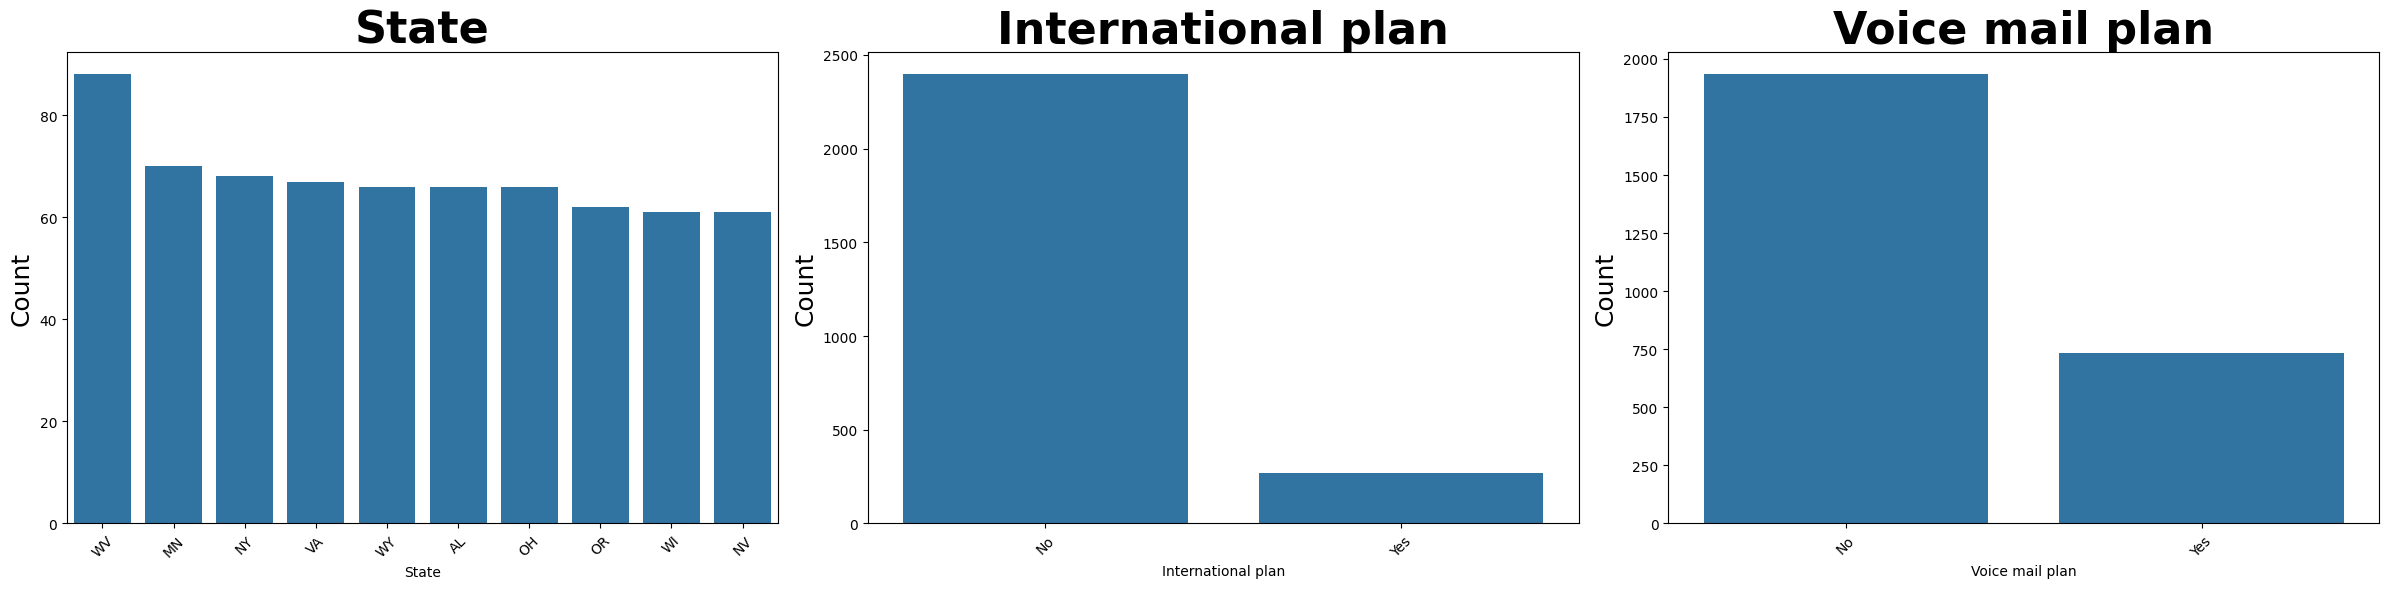

In [10]:
df_cat = ['State', 'International plan', 'Voice mail plan']
n_cols = 4
n_rows = (len(df_cat) + n_cols - 1) // n_cols

fig = plt.figure(figsize=(8*n_cols, 6*n_rows))

for i, col in enumerate(df_cat):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10], ax=ax)
    ax.set_title(col, fontsize=32, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.set_ylabel('Count', fontsize=18)

plt.tight_layout()
plt.show()

Target Variable Distribution

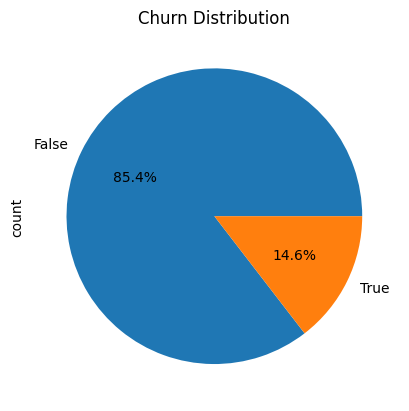

In [11]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

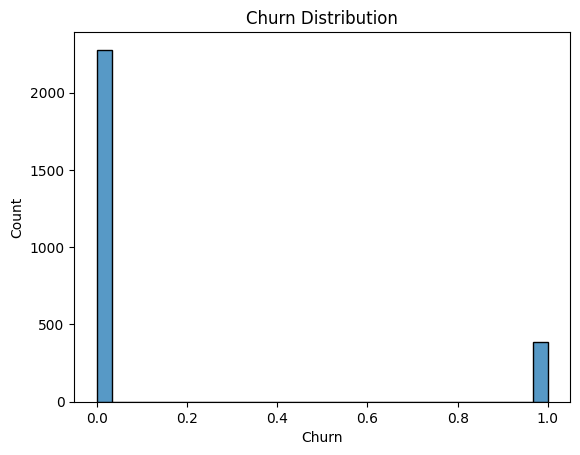

In [12]:
sns.histplot(df['Churn'], bins=30)
plt.title('Churn Distribution')
plt.show()


Feature Correlation for main dataset

In [13]:
df_num = df._get_numeric_data()

df_corr = df_num.corr()['Churn'].drop('Churn')

df_corr

Account length            0.017728
Area code                 0.001019
Number vmail messages    -0.086474
Total day minutes         0.195688
Total day calls           0.018290
Total eve minutes         0.072906
Total eve calls          -0.001539
Total night minutes       0.033639
Total night calls         0.012262
Total intl minutes        0.086204
Total intl calls         -0.069882
Customer service calls    0.202590
Name: Churn, dtype: float64

In [14]:
df_num.corr()['Churn'].drop('Churn').abs().sort_values(ascending=False)


Customer service calls    0.202590
Total day minutes         0.195688
Number vmail messages     0.086474
Total intl minutes        0.086204
Total eve minutes         0.072906
Total intl calls          0.069882
Total night minutes       0.033639
Total day calls           0.018290
Account length            0.017728
Total night calls         0.012262
Total eve calls           0.001539
Area code                 0.001019
Name: Churn, dtype: float64

In [15]:
df_num.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls', 'Customer service calls',
       'Churn'],
      dtype='object')

In [16]:
df_corr = df_num[['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls', 'Customer service calls']]

df_corr = df_corr.corr()

Feature Correlation Heatmap

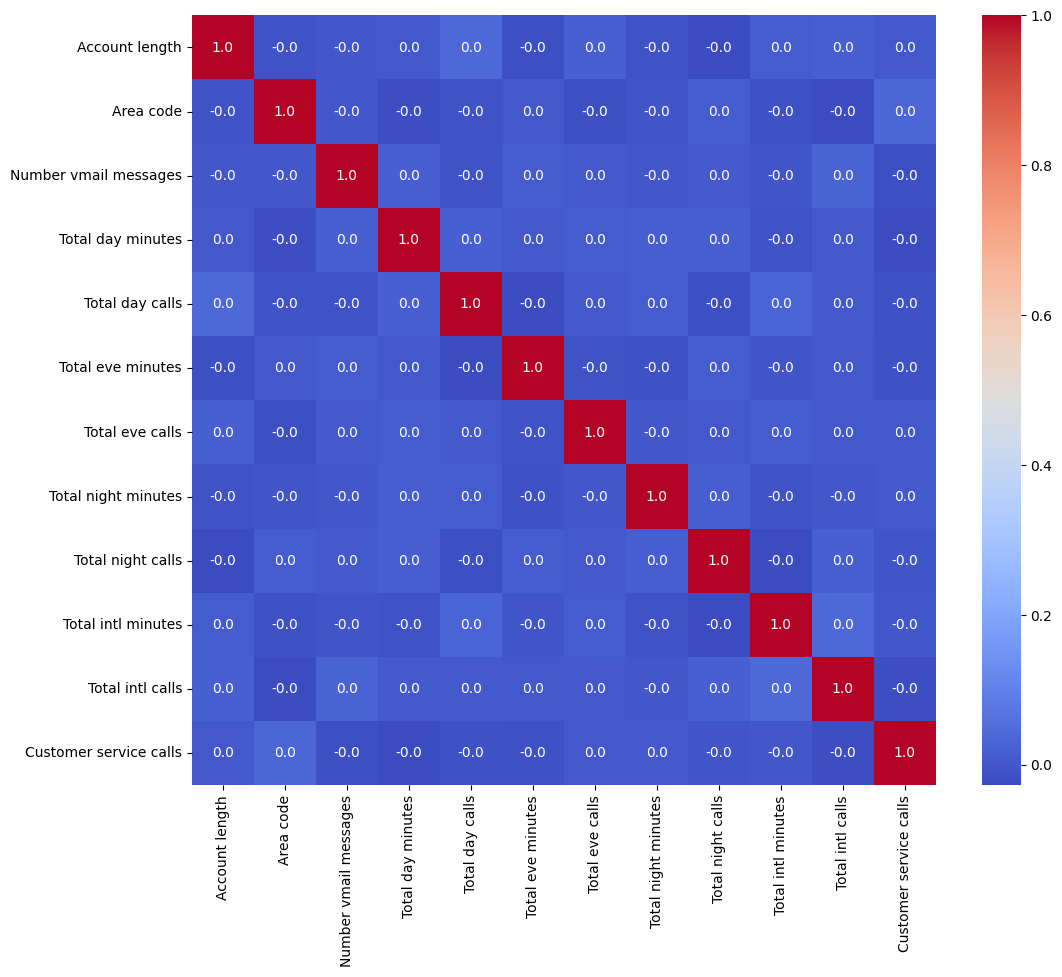

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df_corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

Data Splitting

In [18]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])

In [19]:
train.shape

(2132, 16)

In [20]:
test.shape

(534, 16)

Preprocessing

In [21]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
1229,MD,102,415,No,No,0,271.1,80,172.0,133,169.2,105,10.3,5,1,False
2001,MT,157,408,No,No,0,240.2,67,153.0,98,249.0,72,10.2,6,2,False
1421,TX,79,415,No,No,0,144.0,90,135.8,91,212.4,129,13.0,4,1,False
1346,NM,132,408,No,No,0,169.9,107,209.4,121,206.1,79,11.5,2,1,False
86,AZ,95,408,No,No,0,238.1,65,187.2,98,190.0,115,11.8,4,4,False


In [22]:
numerical_features = ['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls', 'Customer service calls']

categorical_features = ['State', 'International plan', 'Voice mail plan']

In [23]:
preprocessor = ColumnTransformer(transformers=[
    ('scaled', StandardScaler(), (numerical_features)),
    ('encoded', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), (categorical_features))
],
remainder='passthrough')

preprocessor.set_output(transform='pandas')

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('scaled', ...), ('encoded', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_

In [24]:
train_clean = preprocessor.fit_transform(train)
train_clean.head()

,scaled__Account length,scaled__Area code,scaled__Number vmail messages,scaled__Total day minutes,scaled__Total day calls,scaled__Total eve minutes,scaled__Total eve calls,scaled__Total night minutes,scaled__Total night calls,scaled__Total intl minutes,...,encoded__State_VT,encoded__State_WA,encoded__State_WI,encoded__State_WV,encoded__State_WY,encoded__International plan_No,encoded__International plan_Yes,encoded__Voice mail plan_No,encoded__Voice mail plan_Yes,remainder__Churn
1229,0.033303,-0.521107,-0.583143,1.688380,-1.009029,-0.562170,1.639851,-0.624170,0.238208,0.025481,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
2001,1.423013,-0.686677,-0.583143,1.118432,-1.655453,-0.932862,-0.111558,0.946827,-1.466883,-0.010096,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
1421,-0.547849,-0.521107,-0.583143,-0.655970,-0.511780,-1.268436,-0.461840,0.226294,1.478274,0.986060,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
1346,0.791327,-0.686677,-0.583143,-0.178246,0.333544,0.167508,1.039368,0.102268,-1.105197,0.452405,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
86,-0.143569,-0.686677,-0.583143,1.079698,-1.754903,-0.265617,-0.111558,-0.214687,0.754902,0.559136,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False


In [25]:
train_clean.head()

,scaled__Account length,scaled__Area code,scaled__Number vmail messages,scaled__Total day minutes,scaled__Total day calls,scaled__Total eve minutes,scaled__Total eve calls,scaled__Total night minutes,scaled__Total night calls,scaled__Total intl minutes,...,encoded__State_VT,encoded__State_WA,encoded__State_WI,encoded__State_WV,encoded__State_WY,encoded__International plan_No,encoded__International plan_Yes,encoded__Voice mail plan_No,encoded__Voice mail plan_Yes,remainder__Churn
1229,0.033303,-0.521107,-0.583143,1.688380,-1.009029,-0.562170,1.639851,-0.624170,0.238208,0.025481,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
2001,1.423013,-0.686677,-0.583143,1.118432,-1.655453,-0.932862,-0.111558,0.946827,-1.466883,-0.010096,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
1421,-0.547849,-0.521107,-0.583143,-0.655970,-0.511780,-1.268436,-0.461840,0.226294,1.478274,0.986060,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
1346,0.791327,-0.686677,-0.583143,-0.178246,0.333544,0.167508,1.039368,0.102268,-1.105197,0.452405,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
86,-0.143569,-0.686677,-0.583143,1.079698,-1.754903,-0.265617,-0.111558,-0.214687,0.754902,0.559136,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False


In [26]:
train_clean.to_csv('train data.csv', index=False)
test.to_csv('test data.csv', index=False)
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']